In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from scipy import stats
from scipy.optimize import curve_fit

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
# comment the below line because it also change the circle edge width
#mpl.rcParams['lines.markeredgewidth'] = 3 # plus cross marker
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
#legend
#mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.numpoints'] = 2 #default 2
mpl.rcParams['legend.fontsize'] = 18
#figure width or height
mpl.rcParams['figure.subplot.left'] = 0.175 #default 0.125
mpl.rcParams['figure.subplot.bottom'] = 0.15 #default 0.1
mpl.rcParams['figure.figsize'] = 10, 7.5 #default 8, 6



In [65]:
path='/home/yaohua/Downloads/HW_research/electrolyte/'
childPath = '006-L2/'
fn='tcaf_fit.xvg'
with open(path+childPath+fn) as f:
    lines = f.readlines()


In [78]:
count=0
for line in lines:
    count += 1
    print("Line{}: {}".format(count, line.strip()))
    if count==160:
        break

Line1: # This file was created Mon Jan 30 17:31:01 2023
Line2: # Created by:
Line3: #                       :-) GROMACS - gmx tcaf, 2020.6 (-:
Line4: #
Line5: # Executable:   /public/software/.local/easybuild/software/GROMACS/2020.6-foss-2021a-lmfit/install/bin/gmx
Line6: # Data prefix:  /public/software/.local/easybuild/software/GROMACS/2020.6-foss-2021a-lmfit/install
Line7: # Working dir:  /home/cloudam/yaohua/electrolyte/006-L2/LigParWorkflow/simulation
Line8: # Command line:
Line9: #   gmx tcaf -f run.trr -s run.gro -k34
Line10: # gmx tcaf is part of G R O M A C S:
Line11: #
Line12: # Gallium Rubidium Oxygen Manganese Argon Carbon Silicon
Line13: #
Line14: @    title "TCAF Fits"
Line15: @    xaxis  label "Time (ps)"
Line16: @    yaxis  label ""
Line17: @TYPE xy
Line18: 0 1
Line19: 0.2 0.990436
Line20: 0.4 0.962839
Line21: 0.6 0.919019
Line22: 0.8 0.860961
Line23: 1 0.790779
Line24: 1.2 0.710665
Line25: 1.4 0.622841
Line26: 1.6 0.529516
Line27: 1.8 0.432848
Line28: 2 0.3349
Line29: 

In [98]:
flag = True
count = 0
newData = []
collection = []
with open(path+childPath+'tcaf_fit.xvg', 'r') as f:
    for _ in range(500):
        line = f.readline()
        newData.append(line)
        if line == '&\n':
            count += 1
            collection.append(newData)
            newData=[]
            continue
            
        
    


In [99]:
len(collection)

3

In [101]:
with open(path+childPath+'fit2.xvg', 'w') as f:
    
    for _, line in enumerate(newData):
        f.write(line)

In [76]:
type(line)

str

In [102]:
#data=np.genfromtxt(path+childPath+fn,skip_header=20,skip_footer=1)

data2=np.genfromtxt(path+childPath+'fit1.xvg', skip_header=19)
data3 = np.genfromtxt(path+childPath+'fit2.xvg', skip_header=0)

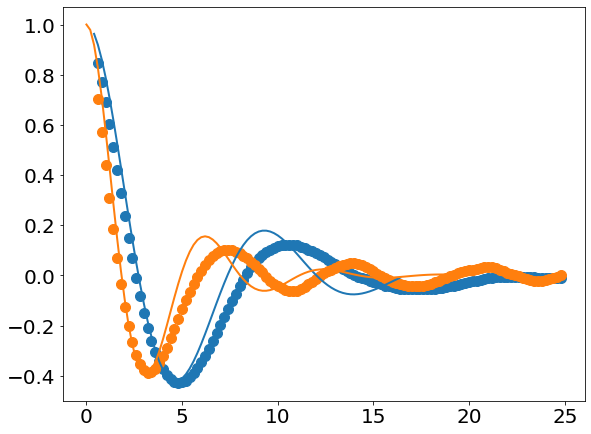

In [103]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], data[:,5])
plt.plot(data2[:,0], data2[:,1])
plt.plot(data3[:,0], data3[:,1])

In [111]:
path='/home/yaohua/Downloads/HW_research/electrolyte/'
childPath = '006-L2/'
fn='visc_k2.xvg'
with open(path+childPath+fn) as f:
    lines = f.readlines()


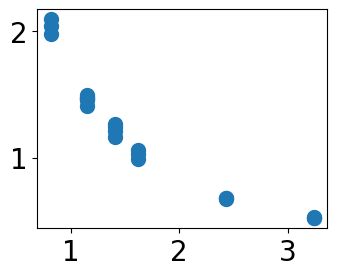

In [115]:
data=np.genfromtxt(path+childPath+fn,skip_header=20,skip_footer=1)
x=data[:-1,0]
y=data[:-1,1]

plt.figure(figsize=(4, 3), dpi=100)
plt.scatter(x,y)


In [121]:
data = np.genfromtxt('/home/yaohua/Downloads/HW_research/electrolyte/Soochow-server/0010-1m-pf6--bf4--27-fdec/visc_k.xvg', skip_header=20)

In [127]:
data=np.genfromtxt('/home/yaohua/Downloads/HW_research/HDB_lab/test_acetic_acid/visc_k.xvg',skip_header=20)

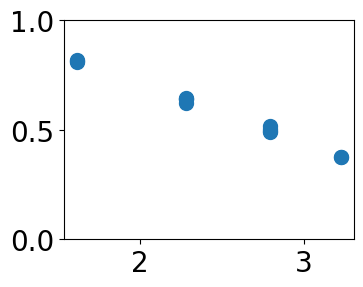

In [130]:
x=data[:-1,0]
y=data[:-1,1]

plt.figure(figsize=(4, 3), dpi=100)
plt.ylim(0,1)
plt.scatter(x,y)

In [116]:
y

array([2.09614 , 1.98182 , 2.04315 , 1.47375 , 1.40868 , 1.48089 ,
       1.45466 , 1.46377 , 1.49254 , 1.24535 , 1.26546 , 1.16609 ,
       1.21278 , 1.05884 , 1.02506 , 0.991833, 0.677771, 0.679881,
       0.672992, 0.523808, 0.518427, 0.525857])

In [123]:
def func(x, a, b):
    return a*(1+b*x*x)

In [124]:
popt, pcov = curve_fit(func, x, y)
popt

array([ 1.19858846, -0.04058144])

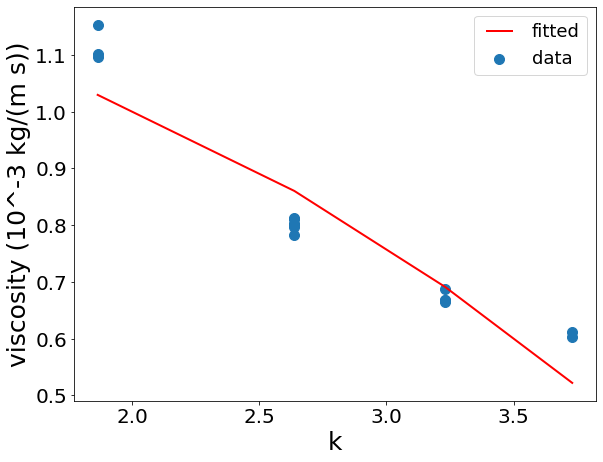

In [125]:
xgrid = np.linspace(0, 3, 50)
plt.figure()
plt.scatter(x, y, label='data')
plt.plot(x, func(x, *popt), 'r-', label='fitted')
plt.xlabel('k')

plt.ylabel('viscosity (10^-3 kg/(m s))')
plt.legend()
plt.savefig('viscosity-silane10.png')

In [64]:
data=np.genfromtxt(path+childPath+fn,skip_header=20,skip_footer=1)

data2=np.genfromtxt(path+childPath+'tcaf_fit.xvg', skip_header=20)

ValueError: Some errors were detected !
    Line #144 (got 1 columns instead of 2)
    Line #271 (got 1 columns instead of 2)
    Line #398 (got 1 columns instead of 2)
    Line #525 (got 1 columns instead of 2)
    Line #652 (got 1 columns instead of 2)
    Line #779 (got 1 columns instead of 2)
    Line #906 (got 1 columns instead of 2)
    Line #1033 (got 1 columns instead of 2)
    Line #1160 (got 1 columns instead of 2)
    Line #1287 (got 1 columns instead of 2)
    Line #1414 (got 1 columns instead of 2)
    Line #1541 (got 1 columns instead of 2)
    Line #1668 (got 1 columns instead of 2)
    Line #1795 (got 1 columns instead of 2)
    Line #1922 (got 1 columns instead of 2)
    Line #2049 (got 1 columns instead of 2)
    Line #2176 (got 1 columns instead of 2)
    Line #2303 (got 1 columns instead of 2)
    Line #2430 (got 1 columns instead of 2)
    Line #2557 (got 1 columns instead of 2)
    Line #2684 (got 1 columns instead of 2)
    Line #2811 (got 1 columns instead of 2)
    Line #2938 (got 1 columns instead of 2)
    Line #3065 (got 1 columns instead of 2)

In [40]:
resultFn = 'viscosity.txt'
with open(path + resultFn, 'a') as fr:
    fr.write(str(popt[0]))

with open(path + 'index_visco.txt', 'a') as f:
    f.write(childPath)

In [19]:
xx=np.array(x)**2
res=stats.linregress(newx,newy)
res.intercept

ValueError: Inputs must not be empty.

In [9]:
r2=res.rvalue**2
r2

0.913141594046064

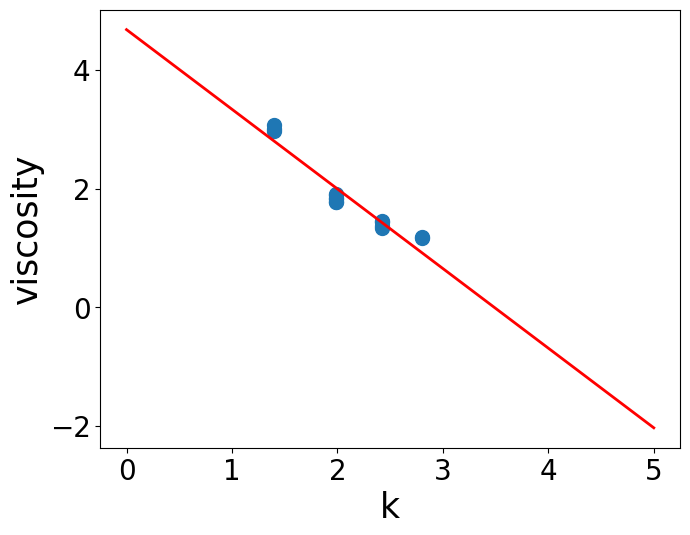

In [10]:
plt.figure(figsize=(8, 6), dpi=100)

plt.scatter(newx,newy)
xx = np.linspace(0,5,100)
plt.plot(xx, res.intercept + res.slope*xx, 'r', label='fitted line')
#plt.plot(x,data[:,2])
#plt.plot(x,data[:,3],'b')
#plt.plot(x,data[:,4])
#plt.xlim(0, 3)
plt.xlabel('k')
plt.ylabel('viscosity')
plt.savefig(path+'visco_k.png')


In [318]:
1.6**3

4.096000000000001

In [319]:
1.6*50

80.0

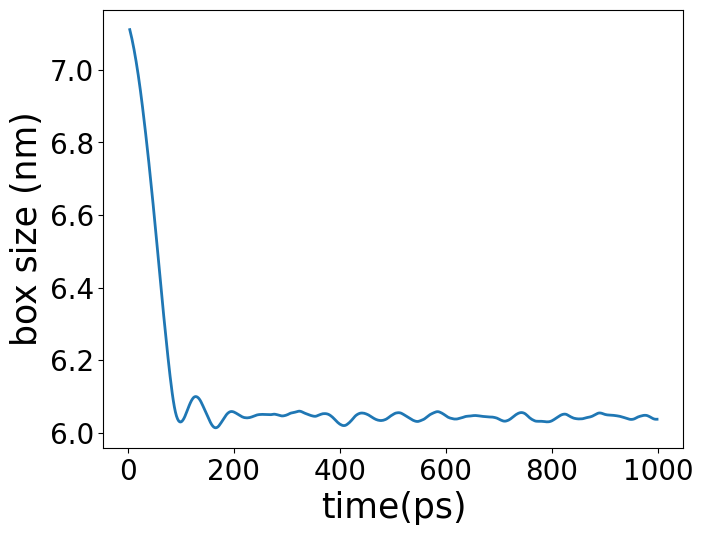

In [95]:
fn='type3_2/T400/energy.xvg'
data=np.genfromtxt(fn,skip_header=28,skip_footer=1)
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(data[:,0],data[:,3])
plt.xlabel('time(ps)')
plt.ylabel('box size (nm)')
plt.savefig(path+'boxsize.png')
#plt.plot(data[:,0],data[:,2])


(-2000.0, 2000.0)

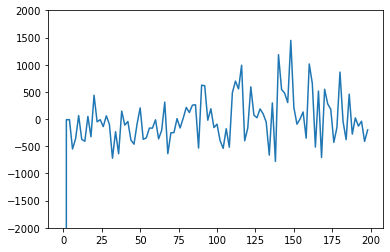

In [39]:
plt.plot(x,data[:,2])
plt.ylim(-2000,2000)

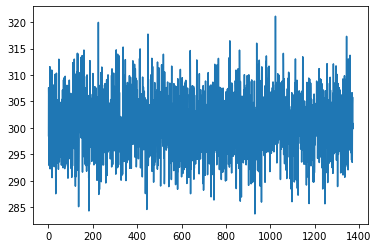

In [74]:
plt.plot(x,data[:,1])


In [33]:
plt.plot(x,data[:,3])
plt.xlabel('time/s')
plt.ylabel('system size (nm)')

IndexError: index 3 is out of bounds for axis 1 with size 2

In [85]:
str1 = "this is string example....wow!!!";
str2 = "exam";
 


In [87]:
idx=str1.find('exam')

In [88]:
idx

15

In [174]:
sol=Solution()

In [182]:
nums = [-1,0,3,5,6,7,8,9,11,13,14,15,16,17,18,19,20]
print(len(nums))
index = sol.search(nums,4,0)
index

17
left part
cumulative=0
[-1, 0, 3, 5, 6, 7, 8, 9]
left part
cumulative=0
[-1, 0, 3, 5]
right part
cumulative=3
[5]


In [184]:
count=dict()
line=input('put a line')
words=line.split()
for word in words:
    count[word] = count.get(word, 0) + 1
    

put a lineha ha I am an idiet an idiet idiet


In [185]:
count

{'ha': 2, 'I': 1, 'am': 1, 'an': 2, 'idiet': 3}

In [210]:
sol=Solution()
sol.firstBadVersion(6)

3
4


3

In [ ]:
from Bio.PDB import *
import nglview as nv
import ipywidgets

In [57]:
name = 'huawei'
for i,s in enumerate(name):
    print(i)
else:
    print('foo')

0
1
2
3
4
5
foo


In [58]:
 class Foo:
        def __init__(self, name):
            self._name = name
            
        def __str__(self):
            return self_name
        def __eq__(self, other):
            return self is other
        
class Bar(Foo):
    def __eq__(self,other):
        return str(self)==str(other)
foo = Foo('Hello')
bar=Bar('Hello')
print(foo==bar)
print(bar==foo)

NameError: name 'self_name' is not defined

In [61]:
def func(x):
    x = yield x
    x=yield x
    
m=func(3)
 
for x in m:
    print(x, end=' ')

TypeError: object of type 'generator' has no len()

In [65]:
stuple = ('H',4,5)

In [66]:
print('a={0},b{1},c{2}'.format(*stuple))

a=H,b4,c5


In [67]:
a=[1,2,3]
a.pop()

3

In [68]:
'北京'.encode()

b'\xe5\x8c\x97\xe4\xba\xac'

In [69]:
'北京'.decode()

AttributeError: 'str' object has no attribute 'decode'

In [70]:
test =  {"a","b"}

In [71]:
test[0]

TypeError: 'set' object is not subscriptable

In [72]:
float("230"*int('3'))

230230230.0

In [75]:
(2)<<2

8